# Capstone Part 3 - Convolutional Neural Networks
___
## Setup

In [1]:
# Basic packages
import numpy as np
import pandas as pd

# For encoding the emotions as numbers
from sklearn.preprocessing import LabelEncoder

# For splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# For scaling the data
from sklearn.preprocessing import StandardScaler

# Keras
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense # I will try both 1D and 2D, reshaping the data as necessary

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# For model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading in the finished dataframe from part 1
ravdess_mfcc_df = pd.read_csv('C:/Users/Patrick/Documents/Capstone Data/ravdess_mfcc.csv')

Using TensorFlow backend.


___
# Building CNNs for Classifying Emotion for Males
For the initial CNN, I will try a variation of the architecture I learned in class, which used 2D convolution. In my case, I will use 1D convolution. Afterwards I will reshape the data and try 2D convolution to see if there is a difference.

In [2]:
# Making a new dataframe that contains only male recordings
ravdess_mfcc_m_df = ravdess_mfcc_df[ravdess_mfcc_df['Gender'] == 'male'].reset_index().drop('index', axis=1)
ravdess_mfcc_m_df

,0,1,2,3,4,5,6,7,8,9,...,2592,2593,2594,2595,2596,2597,2598,2599,Gender,Emotion
0,-857.309453,-857.309453,-857.309453,-857.309453,-857.309453,-857.309453,-857.309453,-857.165711,-857.309453,-857.309453,...,1.546741,1.982412,2.188718,2.742868,0.987672,1.042513,1.416731,0.817693,male,neutral
1,-864.890286,-864.890286,-864.890286,-864.890286,-861.939471,-860.492254,-863.877686,-862.146948,-860.825373,-862.288360,...,0.760483,0.900741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male,neutral
2,-849.445433,-848.003746,-844.977418,-848.275738,-847.952191,-847.026382,-849.022875,-848.187830,-851.179822,-852.391785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.056836,0.000000,0.000000,male,neutral
3,-832.734397,-836.552680,-834.580541,-827.005858,-830.058798,-831.195983,-839.331695,-838.307510,-834.128916,-839.040966,...,0.098864,0.972775,1.156853,1.185786,0.808819,0.931570,0.595077,-0.121792,male,neutral
4,-903.185111,-903.185111,-903.185111,-903.185111,-903.185111,-903.185111,-903.148748,-903.185111,-903.185111,-903.185111,...,0.217088,1.191406,1.323715,0.000000,0.630213,0.166922,0.312804,0.000000,male,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-704.004406,-703.014570,-702.031038,-703.328468,-703.912309,-703.765455,-704.655862,-704.481680,-703.788671,-702.783204,...,0.000000,0.000000,0.000000,0.000000,0.045276,0.192656,0.852603,0.690963,male,surprised
714,-696.685285,-696.643536,-696.814208,-696.310705,-695.800097,-696.338568,-697.214325,-697.745507,-697.431831,-697.506973,...,0.000000,0.059871,0.004736,0.120239,1.189020,0.927918,0.000000,0.000000,male,surprised
715,-692.801891,-692.803866,-693.082432,-693.371465,-693.371465,-693.371465,-693.371465,-693.351801,-692.287004,-692.734244,...,0.668347,0.486409,0.601826,0.474456,0.194573,0.030500,0.000000,0.118997,male,surprised
716,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,-669.158136,...,0.375527,0.331931,0.036515,0.000000,0.000000,0.000000,0.000000,0.000000,male,surprised


In [180]:
# Splitting the dataframe into features and target
# This time, for simplicity, I will just name the variables X and y instead of Xm and em
X = ravdess_mfcc_m_df.iloc[:, :-2]
y = ravdess_mfcc_m_df['Emotion']

In [181]:
# Encoding the emotions
emotion_encoder = LabelEncoder()
y = emotion_encoder.fit_transform(y)

# Checking the results
y

array([5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7,
       7, 7, 7, 7, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6,
       6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 5,

In [182]:
# Which number represents which emotion?
for num in np.unique(y):
    print(f'{num} represents {emotion_encoder.inverse_transform([num])[0]}.')

0 represents angry.
1 represents calm.
2 represents disgusted.
3 represents fearful.
4 represents happy.
5 represents neutral.
6 represents sad.
7 represents surprised.


In [183]:
# Alternative to the above
for num, emotion in enumerate(emotion_encoder.classes_):
    print(f'{num} represents {emotion}.')

0 represents angry.
1 represents calm.
2 represents disgusted.
3 represents fearful.
4 represents happy.
5 represents neutral.
6 represents sad.
7 represents surprised.


In [184]:
# Splitting the data into remainder and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Splitting the remainder further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, stratify=y_remainder, random_state=1)

# Checking the shapes
print('Training set:')
print(X_train.shape)
print(y_train.shape)
print()
print('Validation set:')
print(X_val.shape)
print(y_val.shape)
print()
print('Test set:')
print(X_test.shape)
print(y_test.shape)

Training set:
(401, 2600)
(401,)

Validation set:
(173, 2600)
(173,)

Test set:
(144, 2600)
(144,)


In [137]:
# Standard scaling

# Instantiate the scaler and fit to X_train
scaler = StandardScaler().fit(X_train)

# Transform X_train
X_train = scaler.transform(X_train)

# Transform X_val
X_val = scaler.transform(X_val)

# Transform X_test
X_test = scaler.transform(X_test)

Now I will build a 1D CNN.

In [138]:
# Reshaping the scaled Xs for use in the 1D CNN
X_train_1d = X_train.reshape(401, 2600, 1)
X_val_1d = X_val.reshape(173, 2600, 1)
X_test_1d = X_test.reshape(144, 2600, 1)

# Checking the shapes
print('Shape of reshaped X_train_1d:', X_train_1d.shape)
print('Shape of reshaped X_val_1d:', X_val_1d.shape)
print('Shape of reshaped X_test_1d:', X_test_1d.shape)

Shape of reshaped X_train_1d: (401, 2600, 1)
Shape of reshaped X_val_1d: (173, 2600, 1)
Shape of reshaped X_test_1d: (144, 2600, 1)


In [10]:
# Setting up the 1D CNN
cnn_1d = Sequential()

# 32 convolutions
cnn_1d.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(2600, 1)))

# 64 convolutions
cnn_1d.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Max pooling for dimensionality reduction; reducing noise to pick up on the strongest patterns
cnn_1d.add(MaxPooling1D(pool_size=2))

# Dropout to help prevent overfitting
cnn_1d.add(Dropout(rate=0.25))

# Flatten to a one-dimensional array
cnn_1d.add(Flatten())

# Fully connected layer
cnn_1d.add(Dense(units=128, activation='relu'))

# More dropout
cnn_1d.add(Dropout(rate=0.5))

# Last dense layer with number of units equal to the number of different emotions
cnn_1d.add(Dense(units=8, activation='softmax'))

# Summary
cnn_1d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2598, 32)          128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2596, 64)          6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1298, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1298, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 83072)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10633344  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
# Compiling the CNN with the desired loss function, optimizer, and metric to optimize
cnn_1d.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
# Fitting the CNN
cnn_1d_history = cnn_1d.fit(x=X_train_1d, y=y_train, epochs=25, verbose=1, validation_data=(X_val_1d, y_val))

Train on 401 samples, validate on 173 samples
Epoch 1/25
401/401 [==============================] - 8s 20ms/step - loss: 2.6700 - acc: 0.1845 - val_loss: 1.9208 - val_acc: 0.2832
Epoch 2/25
401/401 [==============================] - 8s 19ms/step - loss: 1.7971 - acc: 0.3641 - val_loss: 1.8109 - val_acc: 0.3468
Epoch 3/25
401/401 [==============================] - 7s 18ms/step - loss: 1.5427 - acc: 0.4539 - val_loss: 1.6187 - val_acc: 0.3931
Epoch 4/25
401/401 [==============================] - 8s 19ms/step - loss: 1.2303 - acc: 0.5586 - val_loss: 1.5328 - val_acc: 0.4624
Epoch 5/25
401/401 [==============================] - 7s 18ms/step - loss: 0.9244 - acc: 0.6858 - val_loss: 1.5315 - val_acc: 0.4740
Epoch 6/25
401/401 [==============================] - 7s 18ms/step - loss: 0.7068 - acc: 0.7406 - val_loss: 1.5598 - val_acc: 0.4162
Epoch 7/25
401/401 [==============================] - 7s 18ms/step - loss: 0.4114 - acc: 0.8678 - val_loss: 1.5618 - val_acc: 0.5260
Epoch 8/25
401/401 [===

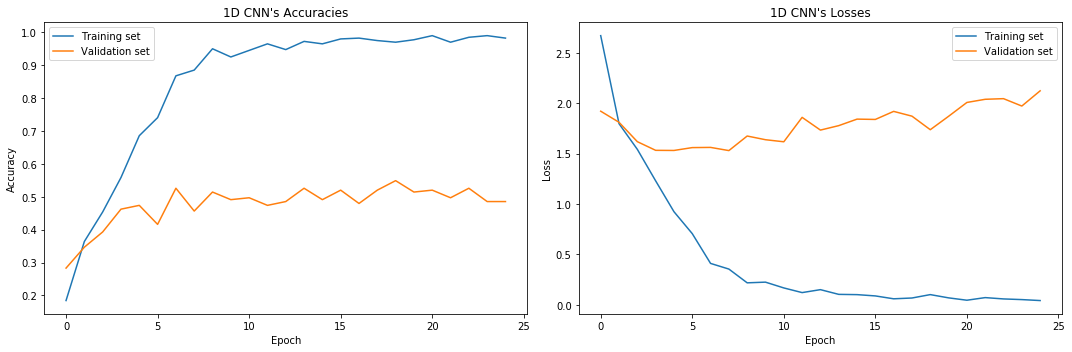

In [37]:
# Plotting the accuracies and losses of the 1D CNN
plt.subplots(1, 2, figsize=(15, 5))

# Accuracies
plt.subplot(1, 2, 1)
plt.plot(cnn_1d_history.history['acc'], label='Training set')
plt.plot(cnn_1d_history.history['val_acc'], label='Validation set')
plt.title("1D CNN's Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Losses
plt.subplot(1, 2, 2)
plt.plot(cnn_1d_history.history['loss'], label='Training set')
plt.plot(cnn_1d_history.history['val_loss'], label='Validation set')
plt.title("1D CNN's Losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
# Evaluating the 1D CNN's performance on the test set
cnn_1d_score = cnn_1d.evaluate(x=X_test_1d, y=y_test, verbose=1)

print(f'Test loss: {cnn_1d_score[0]}')
print(f'Test accuracy: {cnn_1d_score[1]*100}%')

144/144 [==============================] - 0s 3ms/step
Test loss: 2.5239159795973034
Test accuracy: 44.44444444444444%


Notes on the initial 1D CNN:
- It seems to overfit to the training set after the 5th epoch or so
- Its accuracy on the validation set plateaus around 50%
- Its validation loss has an upward trend
- It does not perform as well as logistic regression or support vector machine, which were built and evaluated in part 2.

Now I will try a 2D CNN.

In [45]:
# Reshaping the scaled Xs again, this time for use in the 2D CNN
X_train_2d = X_train.reshape(401, 20, 130, 1)
X_val_2d = X_val.reshape(173, 20, 130, 1)
X_test_2d = X_test.reshape(144, 20, 130, 1)

# Checking the shapes
print('Shape of reshaped X_train_2d:', X_train_2d.shape)
print('Shape of reshaped X_val_2d:', X_val_2d.shape)
print('Shape of reshaped X_test_2d:', X_test_2d.shape)

Shape of reshaped X_train_2d: (401, 20, 130, 1)
Shape of reshaped X_val_2d: (173, 20, 130, 1)
Shape of reshaped X_test_2d: (144, 20, 130, 1)


In [71]:
# Setting up the 2D CNN
cnn_2d = Sequential()

# 32 convolutions
cnn_2d.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(20, 130, 1)))

# 64 convolutions
cnn_2d.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Max pooling for dimensionality reduction; reducing noise to pick up on the strongest patterns
cnn_2d.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout to help prevent overfitting
cnn_2d.add(Dropout(rate=0.25))

# Flatten to a one-dimensional array
cnn_2d.add(Flatten())

# Fully connected layer
cnn_2d.add(Dense(units=128, activation='relu'))

# More dropout
cnn_2d.add(Dropout(rate=0.5))

# Last dense layer with number of units equal to the number of different emotions
cnn_2d.add(Dense(units=8, activation='softmax'))

# Summary
cnn_2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 18, 128, 32)       320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 126, 64)       18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 63, 64)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 63, 64)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32256)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4128896   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [72]:
# Compiling the CNN with the desired loss function, optimizer, and metric to optimize
cnn_2d.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [41]:
# Fitting the CNN
cnn_2d_history = cnn_2d.fit(x=X_train_2d, y=y_train, epochs=25, verbose=1, validation_data=(X_val_2d, y_val))

Train on 401 samples, validate on 173 samples
Epoch 1/25
401/401 [==============================] - 8s 20ms/step - loss: 2.2838 - acc: 0.1546 - val_loss: 2.0418 - val_acc: 0.2023
Epoch 2/25
401/401 [==============================] - 7s 17ms/step - loss: 1.9969 - acc: 0.3117 - val_loss: 1.9267 - val_acc: 0.2948
Epoch 3/25
401/401 [==============================] - 7s 18ms/step - loss: 1.7577 - acc: 0.3591 - val_loss: 1.7420 - val_acc: 0.3295
Epoch 4/25
401/401 [==============================] - 7s 17ms/step - loss: 1.4653 - acc: 0.4688 - val_loss: 1.6178 - val_acc: 0.4104
Epoch 5/25
401/401 [==============================] - 7s 17ms/step - loss: 1.2071 - acc: 0.5960 - val_loss: 1.5189 - val_acc: 0.4624
Epoch 6/25
401/401 [==============================] - 7s 18ms/step - loss: 0.9476 - acc: 0.6808 - val_loss: 1.4948 - val_acc: 0.5145
Epoch 7/25
401/401 [==============================] - 7s 18ms/step - loss: 0.6662 - acc: 0.7830 - val_loss: 1.4667 - val_acc: 0.5145
Epoch 8/25
401/401 [===

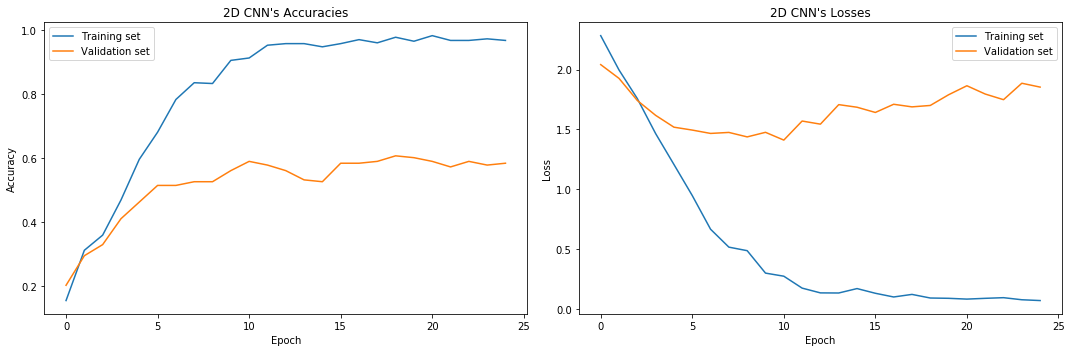

In [42]:
# Plotting the accuracies and losses of the 2D CNN
plt.subplots(1, 2, figsize=(15, 5))

# Accuracies
plt.subplot(1, 2, 1)
plt.plot(cnn_2d_history.history['acc'], label='Training set')
plt.plot(cnn_2d_history.history['val_acc'], label='Validation set')
plt.title("2D CNN's Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Losses
plt.subplot(1, 2, 2)
plt.plot(cnn_2d_history.history['loss'], label='Training set')
plt.plot(cnn_2d_history.history['val_loss'], label='Validation set')
plt.title("2D CNN's Losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
# Evaluating the 2D CNN's performance on the test set
cnn_2d_score = cnn_2d.evaluate(x=X_test_2d, y=y_test, verbose=1)

print(f'Test loss: {cnn_2d_score[0]}')
print(f'Test accuracy: {cnn_2d_score[1]*100}%')

144/144 [==============================] - 1s 5ms/step
Test loss: 2.100012196434869
Test accuracy: 13.88888888888889%


Although the 2D CNN seemed to be doing slightly better than the 1D CNN in the epochs, its accuracy on the test set is far worse. It has also overfit to the training set.

___
## Architecture found on Kaggle
I will now try an architecture that I found here, created by Kaggle user dasanurag38: https://www.kaggle.com/dasanurag38/audio-emotion-recognition

In [98]:
cnn_anu = Sequential()

cnn_anu.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(2600, 1)))

cnn_anu.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

cnn_anu.add(MaxPooling1D(pool_size=2))

cnn_anu.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

cnn_anu.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

cnn_anu.add(MaxPooling1D(pool_size=2))

cnn_anu.add(Flatten())

cnn_anu.add(Dense(units=8, activation='softmax'))

cnn_anu.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [99]:
cnn_anu_history = cnn_anu.fit(x=X_train_1d, y=y_train, epochs=25, verbose=1, validation_data=(X_val_1d, y_val))

Train on 401 samples, validate on 173 samples
Epoch 1/25
401/401 [==============================] - 3s 7ms/step - loss: 2.0108 - acc: 0.2070 - val_loss: 1.8988 - val_acc: 0.2948
Epoch 2/25
401/401 [==============================] - 2s 4ms/step - loss: 1.5305 - acc: 0.5062 - val_loss: 1.7160 - val_acc: 0.3584
Epoch 3/25
401/401 [==============================] - 2s 5ms/step - loss: 1.0162 - acc: 0.6484 - val_loss: 1.5842 - val_acc: 0.4277
Epoch 4/25
401/401 [==============================] - 2s 5ms/step - loss: 0.5536 - acc: 0.8404 - val_loss: 1.4352 - val_acc: 0.5087
Epoch 5/25
401/401 [==============================] - 2s 5ms/step - loss: 0.2360 - acc: 0.9426 - val_loss: 1.5530 - val_acc: 0.5260
Epoch 6/25
401/401 [==============================] - 3s 7ms/step - loss: 0.0708 - acc: 0.9950 - val_loss: 1.7869 - val_acc: 0.5607
Epoch 7/25
401/401 [==============================] - 3s 7ms/step - loss: 0.0296 - acc: 0.9975 - val_loss: 1.8563 - val_acc: 0.5491
Epoch 8/25
401/401 [==========

Still no good. I will try a variation of dasanurag38's architecture.

In [106]:
cnn_anu = Sequential()

cnn_anu.add(Conv1D(filters=8, kernel_size=200, activation='relu', input_shape=(2600, 1)))

cnn_anu.add(Conv1D(filters=16, kernel_size=100, activation='relu'))

cnn_anu.add(MaxPooling1D(pool_size=50))

cnn_anu.add(Conv1D(filters=32, kernel_size=25, activation='relu'))

cnn_anu.add(Conv1D(filters=16, kernel_size=12, activation='relu'))

cnn_anu.add(MaxPooling1D(pool_size=6))

cnn_anu.add(Flatten())

cnn_anu.add(Dense(units=8, activation='softmax'))

cnn_anu.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [135]:
X_train_1d.shape

(401, 2600, 1)

In [99]:
cnn_anu_history = cnn_anu.fit(x=X_train_1d, y=y_train, epochs=25, verbose=1, validation_data=(X_val_1d, y_val))

Train on 401 samples, validate on 173 samples
Epoch 1/25
401/401 [==============================] - 3s 7ms/step - loss: 2.0108 - acc: 0.2070 - val_loss: 1.8988 - val_acc: 0.2948
Epoch 2/25
401/401 [==============================] - 2s 4ms/step - loss: 1.5305 - acc: 0.5062 - val_loss: 1.7160 - val_acc: 0.3584
Epoch 3/25
401/401 [==============================] - 2s 5ms/step - loss: 1.0162 - acc: 0.6484 - val_loss: 1.5842 - val_acc: 0.4277
Epoch 4/25
401/401 [==============================] - 2s 5ms/step - loss: 0.5536 - acc: 0.8404 - val_loss: 1.4352 - val_acc: 0.5087
Epoch 5/25
401/401 [==============================] - 2s 5ms/step - loss: 0.2360 - acc: 0.9426 - val_loss: 1.5530 - val_acc: 0.5260
Epoch 6/25
401/401 [==============================] - 3s 7ms/step - loss: 0.0708 - acc: 0.9950 - val_loss: 1.7869 - val_acc: 0.5607
Epoch 7/25
401/401 [==============================] - 3s 7ms/step - loss: 0.0296 - acc: 0.9975 - val_loss: 1.8563 - val_acc: 0.5491
Epoch 8/25
401/401 [==========

Again, still no good.

___
# Another Approach: Mean MFCCs
dasanurag38 and other Kaggle users used mean MFCCs as features. I will try their approach.

In [188]:
X_mean = []
for i in range(len(X)):
    reshaped = np.array(X.iloc[i]).reshape(20, 130)
    X_mean.append(np.mean(reshaped, axis=1))

X_mean = np.array(X_mean)

In [189]:
# Splitting the data into remainder and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X_mean, y, test_size=0.2, stratify=y, random_state=1)

# Splitting the remainder further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, stratify=y_remainder, random_state=1)

# Checking the shapes
print('Training set:')
print(X_train.shape)
print(y_train.shape)
print()
print('Validation set:')
print(X_val.shape)
print(y_val.shape)
print()
print('Test set:')
print(X_test.shape)
print(y_test.shape)

Training set:
(401, 20)
(401,)

Validation set:
(173, 20)
(173,)

Test set:
(144, 20)
(144,)


In [190]:
# Standard scaling

# Instantiate the scaler and fit to X_train
scaler = StandardScaler().fit(X_train)

# Transform X_train
X_train = scaler.transform(X_train)

# Transform X_val
X_val = scaler.transform(X_val)

# Transform X_test
X_test = scaler.transform(X_test)

In [192]:
X_train = X_train.reshape(401, 20, 1)
X_val = X_val.reshape(173, 20, 1)
X_test = X_test.reshape(144, 20, 1)

In [206]:
cnn_anu = Sequential()

cnn_anu.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(20, 1)))

cnn_anu.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

cnn_anu.add(MaxPooling1D(pool_size=2))

cnn_2d.add(Dropout(rate=0.25))

cnn_anu.add(Flatten())

cnn_anu.add(Dense(units=8, activation='softmax'))

cnn_2d.add(Dropout(rate=0.5))

cnn_anu.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [207]:
cnn_anu_history = cnn_anu.fit(x=X_train, y=y_train, epochs=50, verbose=1, validation_data=(X_val, y_val))

Train on 401 samples, validate on 173 samples
Epoch 1/50
401/401 [==============================] - 2s 4ms/step - loss: 2.0594 - acc: 0.1796 - val_loss: 1.9646 - val_acc: 0.2428
Epoch 2/50
401/401 [==============================] - 0s 209us/step - loss: 1.9249 - acc: 0.2818 - val_loss: 1.9031 - val_acc: 0.2890
Epoch 3/50
401/401 [==============================] - 0s 204us/step - loss: 1.8408 - acc: 0.3541 - val_loss: 1.8396 - val_acc: 0.3121
Epoch 4/50
401/401 [==============================] - 0s 381us/step - loss: 1.7564 - acc: 0.3666 - val_loss: 1.7792 - val_acc: 0.3699
Epoch 5/50
401/401 [==============================] - 0s 299us/step - loss: 1.6712 - acc: 0.4239 - val_loss: 1.7288 - val_acc: 0.3815
Epoch 6/50
401/401 [==============================] - 0s 209us/step - loss: 1.5892 - acc: 0.4489 - val_loss: 1.6663 - val_acc: 0.3757
Epoch 7/50
401/401 [==============================] - 0s 197us/step - loss: 1.5016 - acc: 0.4963 - val_loss: 1.6134 - val_acc: 0.3642
Epoch 8/50
401/401

Again, these are poor performances.

## Conclusion for CNNs:
Given the time constraint, I have been unable to find a good CNN architecture. All of my CNNs have overfit to the training sets and have not performed well on the validation sets in comparison to the classical machine learning models I built and evaluated in part 2. It is likely that I simply do not have enough data points for a CNN to perform well.